In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import os
os.chdir("E:\Phase")
os.getcwd()

'E:\\Phase'

In [2]:
df=pd.read_excel("dataset11.xlsx",sheet_name="Data")

In [4]:
df.columns

Index(['loan_amnt', 'FICO', 'dti', 'emp_length', 'loan_status', 'addr_state',
       'accept_d', 'issue_d', 'funded_amnt', 'Accepted', 'GreaterThan120',
       'Between31_120'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308638 entries, 0 to 308637
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loan_amnt       308638 non-null  float64
 1   FICO            308638 non-null  float64
 2   dti             308638 non-null  float64
 3   emp_length      302529 non-null  object 
 4   loan_status     308638 non-null  object 
 5   addr_state      308638 non-null  object 
 6   accept_d        308638 non-null  object 
 7   issue_d         308638 non-null  object 
 8   funded_amnt     308638 non-null  int64  
 9   Accepted        308638 non-null  object 
 10  GreaterThan120  308638 non-null  object 
 11  Between31_120   308638 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 28.3+ MB


In [6]:
df.dtypes

loan_amnt         float64
FICO              float64
dti               float64
emp_length         object
loan_status        object
addr_state         object
accept_d           object
issue_d            object
funded_amnt         int64
Accepted           object
GreaterThan120     object
Between31_120      object
dtype: object

## Observation:
#### emp_length is an object datatype variable inorder to get some useful insights from the emp_length we need to convert it into a 

#### int here we taken <1 as 0.5 and 10+ as 11 such that all values becomes float type and accept_d and issue_d are not in datetime 

#### datatype so we convert it into datetime datatype

In [7]:
df["new_emp_length"]=df["emp_length"].replace(['< 1 year', '10+ years', '6 years', '9 years', '3 years', '1 year',
       '5 years', '2 years', '4 years', '8 years', '7 years'],[0.5,11,6,9,3,1,5,2,4,8,7])

In [8]:
del df["emp_length"]

In [9]:
df.head()

,loan_amnt,FICO,dti,loan_status,addr_state,accept_d,issue_d,funded_amnt,Accepted,GreaterThan120,Between31_120,new_emp_length
0,25000.0,737.0,19.48,Fully Paid,CA,2009-07-26 00:00:00,2009-08-05 00:00:00,25000,Yes,!>120,!31-120,0.5
1,7000.0,707.0,14.29,Fully Paid,NY,2008-05-12 00:00:00,2008-05-27 00:00:00,7000,Yes,!>120,!31-120,0.5
2,1200.0,677.0,5.47,Fully Paid,TX,2010-03-11 00:00:00,2010-03-22 00:00:00,1200,Yes,!>120,!31-120,11.0
3,10800.0,682.0,11.63,Fully Paid,CT,2009-11-04 00:00:00,2009-11-12 00:00:00,10800,Yes,!>120,!31-120,6.0
4,7200.0,662.0,2.05,Current,RI,2012-08-14 00:00:00,2012-08-21 00:00:00,7200,Yes,!>120,!31-120,9.0


In [10]:
df.describe(include="object")

,loan_status,addr_state,accept_d,issue_d,Accepted,GreaterThan120,Between31_120
count,308638,308638,308638,308638,308638,308638,308638
unique,15,51,2120,1478,2,2,2
top,Not Available,No information,No information,No information,No,!>120,!31-120
freq,180611,180611,180611,180611,180611,303678,307117


#### Observation
####  loan_status, addr_state, accept_d, issue_d are having no information as values 


In [11]:
df.isnull().sum()

loan_amnt            0
FICO                 0
dti                  0
loan_status          0
addr_state           0
accept_d             0
issue_d              0
funded_amnt          0
Accepted             0
GreaterThan120       0
Between31_120        0
new_emp_length    6109
dtype: int64

### Changing the Datatype

In [12]:
df["new_Accept_d"]=pd.to_datetime(df["accept_d"],format="%Y-%m-%d %H:%M:%S",errors="coerce")

In [13]:
df["new_issue_d"]=pd.to_datetime(df["issue_d"],format="%Y-%m-%d %H:%M:%S",errors="coerce")

In [14]:
del df["issue_d"]
del df["accept_d"]

In [15]:
df.head()

,loan_amnt,FICO,dti,loan_status,addr_state,funded_amnt,Accepted,GreaterThan120,Between31_120,new_emp_length,new_Accept_d,new_issue_d
0,25000.0,737.0,19.48,Fully Paid,CA,25000,Yes,!>120,!31-120,0.5,2009-07-26,2009-08-05
1,7000.0,707.0,14.29,Fully Paid,NY,7000,Yes,!>120,!31-120,0.5,2008-05-12,2008-05-27
2,1200.0,677.0,5.47,Fully Paid,TX,1200,Yes,!>120,!31-120,11.0,2010-03-11,2010-03-22
3,10800.0,682.0,11.63,Fully Paid,CT,10800,Yes,!>120,!31-120,6.0,2009-11-04,2009-11-12
4,7200.0,662.0,2.05,Current,RI,7200,Yes,!>120,!31-120,9.0,2012-08-14,2012-08-21


### Observation:
#### Here GreaterThan120 and Between31_120 values are somewhat confusing so we are changing them to 0 and 1 

In [16]:
df.dtypes

loan_amnt                float64
FICO                     float64
dti                      float64
loan_status               object
addr_state                object
funded_amnt                int64
Accepted                  object
GreaterThan120            object
Between31_120             object
new_emp_length           float64
new_Accept_d      datetime64[ns]
new_issue_d       datetime64[ns]
dtype: object

### Changing GreaterThan120 and Between31_120

In [17]:
df["new_greaterthan120"]=df["GreaterThan120"].replace(['!>120', '>120'],["0","1"])

In [18]:
df["new_Between31_120"]=df["Between31_120"].replace(['!31-120', '31-120'],["0","1"])

In [19]:
del df["GreaterThan120"]
del df["Between31_120"]

In [20]:
df.head()

,loan_amnt,FICO,dti,loan_status,addr_state,funded_amnt,Accepted,new_emp_length,new_Accept_d,new_issue_d,new_greaterthan120,new_Between31_120
0,25000.0,737.0,19.48,Fully Paid,CA,25000,Yes,0.5,2009-07-26,2009-08-05,0,0
1,7000.0,707.0,14.29,Fully Paid,NY,7000,Yes,0.5,2008-05-12,2008-05-27,0,0
2,1200.0,677.0,5.47,Fully Paid,TX,1200,Yes,11.0,2010-03-11,2010-03-22,0,0
3,10800.0,682.0,11.63,Fully Paid,CT,10800,Yes,6.0,2009-11-04,2009-11-12,0,0
4,7200.0,662.0,2.05,Current,RI,7200,Yes,9.0,2012-08-14,2012-08-21,0,0


In [21]:
df["new_emp_length"].value_counts()

0.5     153951
11.0     43584
2.0      17754
3.0      14955
1.0      14212
5.0      13639
4.0      12593
6.0      10506
7.0       8595
8.0       7033
9.0       5707
Name: new_emp_length, dtype: int64

In [22]:
emp_length_count=df["new_emp_length"].value_counts().index

In [23]:
emp_length_count_values=df["new_emp_length"].value_counts().values

In [24]:
emp_length_count

Float64Index([0.5, 11.0, 2.0, 3.0, 1.0, 5.0, 4.0, 6.0, 7.0, 8.0, 9.0], dtype='float64')

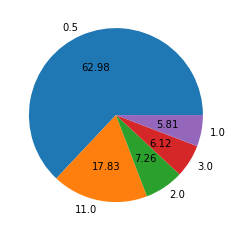

In [25]:
plt.pie(emp_length_count_values[:5],labels=emp_length_count[:5],autopct="%.2f");

### Observation:
#### In the Dataset most are the people have employment experience less than 1 year and then  11 years experience people are high 
#### and then 2 years experience people are there 

In [26]:
df["loan_status"].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'Late (31-120 days)',
       'Default', 'In Grace Period', 'Late (16-30 days)', 'Issued',
       'Does not meet the current credit policy.  Status:Fully Paid',
       'Does not meet the current credit policy.  Status:Charged Off',
       'Does not meet the current credit policy.  Status:Current',
       'Does not meet the current credit policy.  Status:Late (31-120 days)',
       'Does not meet the current credit policy.  Status:In Grace Period',
       'Does not meet the current credit policy.  Status:Late (16-30 days)',
       'Not Available'], dtype=object)

### Missing values

In [27]:
df.isnull().sum()

loan_amnt                  0
FICO                       0
dti                        0
loan_status                0
addr_state                 0
funded_amnt                0
Accepted                   0
new_emp_length          6109
new_Accept_d          180611
new_issue_d           180611
new_greaterthan120         0
new_Between31_120          0
dtype: int64

In [28]:
nullvalues=df.isnull().sum().sum()
nullvalues

367331

In [29]:
null_values_percentage=nullvalues/(df.shape[0]*df.shape[1]) * 100

In [30]:
df.shape

(308638, 12)

In [31]:
null_values_percentage.round(2)

9.92

In [33]:
null_values_list=[l for l in df.columns if df[l].isnull().sum()>0]

In [34]:
print(null_values_list)

['new_emp_length', 'new_Accept_d', 'new_issue_d']


### 'new_emp_length', 'new_Accept_d', 'new_issue_d', 'new_addr_state', 'new_loan_status' these variables are
### having null  values and we have 19.67 percentage of null values in the dataset

## Duplicate values

In [35]:
df.duplicated().sum()

12234

In [36]:
df=df.drop_duplicates()

In [37]:
df.shape

(296404, 12)

In [38]:
df.head()

,loan_amnt,FICO,dti,loan_status,addr_state,funded_amnt,Accepted,new_emp_length,new_Accept_d,new_issue_d,new_greaterthan120,new_Between31_120
0,25000.0,737.0,19.48,Fully Paid,CA,25000,Yes,0.5,2009-07-26,2009-08-05,0,0
1,7000.0,707.0,14.29,Fully Paid,NY,7000,Yes,0.5,2008-05-12,2008-05-27,0,0
2,1200.0,677.0,5.47,Fully Paid,TX,1200,Yes,11.0,2010-03-11,2010-03-22,0,0
3,10800.0,682.0,11.63,Fully Paid,CT,10800,Yes,6.0,2009-11-04,2009-11-12,0,0
4,7200.0,662.0,2.05,Current,RI,7200,Yes,9.0,2012-08-14,2012-08-21,0,0


In [39]:
pd.crosstab(df["loan_status"],df["Accepted"],normalize=True).round(3)*100

Accepted,No,Yes
loan_status,,
Charged Off,0.0,1.4
Current,0.0,30.2
Default,0.0,0.0
Does not meet the current credit policy. Status:Charged Off,0.0,0.2
Does not meet the current credit policy. Status:Current,0.0,0.1
Does not meet the current credit policy. Status:Fully Paid,0.0,0.6
Does not meet the current credit policy. Status:In Grace Period,0.0,0.0
Does not meet the current credit policy. Status:Late (16-30 days),0.0,0.0
Does not meet the current credit policy. Status:Late (31-120 days),0.0,0.0


## 1.At an overall level, what % of loan applications were accepted?

In [40]:
df["Accepted"].value_counts(normalize=True).round(2)*100

No     57.0
Yes    43.0
Name: Accepted, dtype: float64

# 2.How does the % application approval change with the loan amount?


In [41]:
df1=pd.crosstab(df["loan_amnt"],df["Accepted"],normalize="index").reset_index().round(3)*100

In [95]:
df1

Accepted,loan_amnt,No,Yes
0,50000.0,85.3,14.7
1,52500.0,100.0,0.0
2,55000.0,50.0,50.0
3,57500.0,100.0,0.0
4,60000.0,40.0,60.0
...,...,...,...
1408,6400000.0,100.0,0.0
1409,7000000.0,100.0,0.0
1410,30000000.0,100.0,0.0
1411,50000000.0,100.0,0.0


Accepted,loan_amnt,No,Yes
0,50000.0,85.3,14.7
1,52500.0,100.0,0.0
2,55000.0,50.0,50.0
3,57500.0,100.0,0.0
4,60000.0,40.0,60.0
...,...,...,...
1408,6400000.0,100.0,0.0
1409,7000000.0,100.0,0.0
1410,30000000.0,100.0,0.0
1411,50000000.0,100.0,0.0


# univarient analysis

<AxesSubplot:xlabel='Accepted', ylabel='count'>

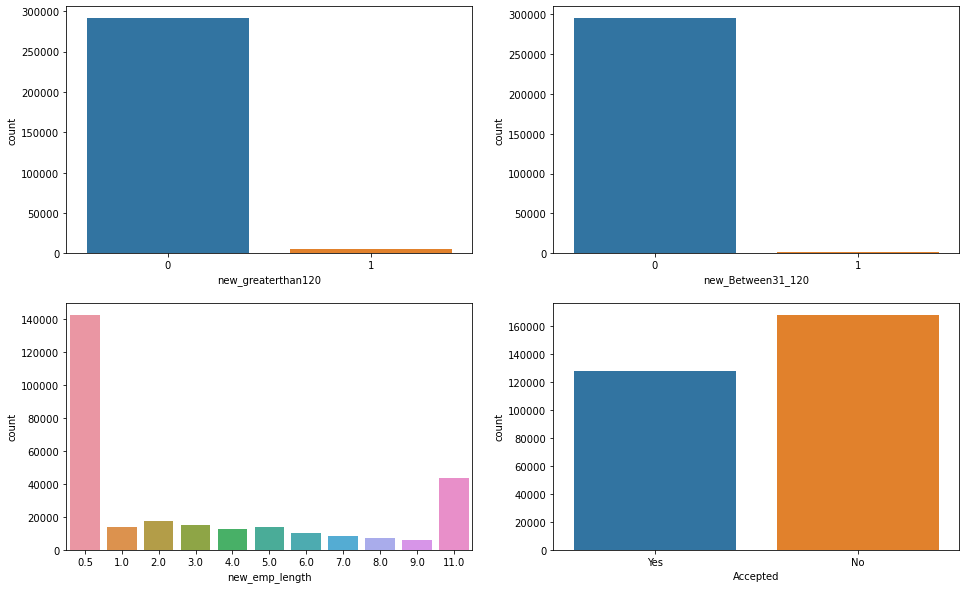

In [42]:
fig,ax=plt.subplots(2,2,figsize=(16,10))
sns.countplot(x="new_greaterthan120",data=df,ax=ax[0][0])
sns.countplot(x="new_Between31_120",data=df,ax=ax[0][1])
sns.countplot(x="new_emp_length",data=df,ax=ax[1][0])
sns.countplot(x="Accepted",data=df,ax=ax[1][1])





## Observations:
#### 1.In the whole dataset we have more customers whose approval is not accepted
#### 2.People with experience  with <1 year are high and next people with experience 11 Years
#### 3.People who havent taken 120 days to pay are very high
#### 4.people who paid between 31 to 120 days are very less

E:\New folder (2)\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


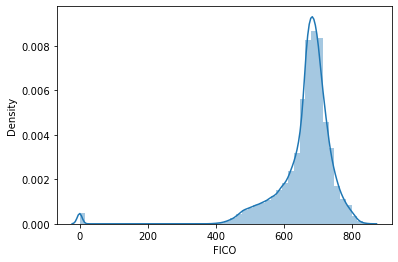

In [43]:
sns.distplot(df["FICO"]);

E:\New folder (2)\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


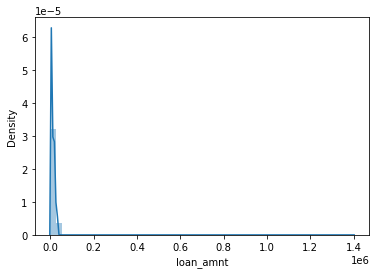

In [44]:
sns.distplot(df["loan_amnt"].round(2));

In [45]:
df["dti"].describe(percentiles=[0.50,0.75,0.90,0.95,0.99]).round(2)

count     296404.00
mean         263.33
std        11424.46
min           -1.00
50%           16.77
75%           25.65
90%           38.15
95%           50.53
99%          155.66
max      3418800.00
Name: dti, dtype: float64

In [46]:
del df["new_Accept_d"]
del df["new_issue_d"]

In [47]:
df.columns

Index(['loan_amnt', 'FICO', 'dti', 'loan_status', 'addr_state', 'funded_amnt',
       'Accepted', 'new_emp_length', 'new_greaterthan120',
       'new_Between31_120'],
      dtype='object')

In [54]:
df1=df[["new_Accept_d","new_issue_d"]]

In [48]:
df.head()

,loan_amnt,FICO,dti,loan_status,addr_state,funded_amnt,Accepted,new_emp_length,new_greaterthan120,new_Between31_120
0,25000.0,737.0,19.48,Fully Paid,CA,25000,Yes,0.5,0,0
1,7000.0,707.0,14.29,Fully Paid,NY,7000,Yes,0.5,0,0
2,1200.0,677.0,5.47,Fully Paid,TX,1200,Yes,11.0,0,0
3,10800.0,682.0,11.63,Fully Paid,CT,10800,Yes,6.0,0,0
4,7200.0,662.0,2.05,Current,RI,7200,Yes,9.0,0,0


In [126]:
df.dropna(how="any",inplace=True)

AttributeError: 'NoneType' object has no attribute 'reset_index'

In [49]:
df=df.reset_index()

In [50]:
df.head()

,index,loan_amnt,FICO,dti,loan_status,addr_state,funded_amnt,Accepted,new_emp_length,new_greaterthan120,new_Between31_120
0,0,25000.0,737.0,19.48,Fully Paid,CA,25000,Yes,0.5,0,0
1,1,7000.0,707.0,14.29,Fully Paid,NY,7000,Yes,0.5,0,0
2,2,1200.0,677.0,5.47,Fully Paid,TX,1200,Yes,11.0,0,0
3,3,10800.0,682.0,11.63,Fully Paid,CT,10800,Yes,6.0,0,0
4,4,7200.0,662.0,2.05,Current,RI,7200,Yes,9.0,0,0


In [51]:
pd.crosstab(df["loan_status"],df["Accepted"])

Accepted,No,Yes
loan_status,,
Charged Off,0,4246
Current,0,89425
Default,0,132
Does not meet the current credit policy. Status:Charged Off,0,714
Does not meet the current credit policy. Status:Current,0,311
Does not meet the current credit policy. Status:Fully Paid,0,1693
Does not meet the current credit policy. Status:In Grace Period,0,7
Does not meet the current credit policy. Status:Late (16-30 days),0,1
Does not meet the current credit policy. Status:Late (31-120 days),0,23


In [52]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
index,296404.0,151390.87,89114.96,0.0,74100.75,149281.50,228414.50,308637.0
loan_amnt,296404.0,13377.37,9935.97,500.0,5300.00,10000.00,20000.00,1400000.0
FICO,296404.0,661.86,90.84,0.0,640.00,678.00,707.00,850.0
dti,296404.0,263.33,11424.46,-1.0,9.40,16.77,25.65,3418800.0
funded_amnt,296404.0,5638.42,8328.98,0.0,0.00,0.00,10000.00,35000.0
new_emp_length,290336.0,3.42,3.88,0.5,0.50,1.00,6.00,11.0


In [53]:
temp=df.sort_values("FICO")

In [54]:
thresholds=[round(i*temp.shape[0]/10) for i in range(11)]

In [55]:
thresholds

[0,
 29640,
 59281,
 88921,
 118562,
 148202,
 177842,
 207483,
 237123,
 266764,
 296404]

In [56]:
bins=["bin_"+str(i) for i in range(1,11)]

In [57]:
bins

['bin_1',
 'bin_2',
 'bin_3',
 'bin_4',
 'bin_5',
 'bin_6',
 'bin_7',
 'bin_8',
 'bin_9',
 'bin_10']

In [58]:
temp["dummies"]=df.index+1

In [59]:
temp["bins"]=pd.cut(temp["dummies"],thresholds,labels=bins)

In [60]:
temp

,index,loan_amnt,FICO,dti,loan_status,addr_state,funded_amnt,Accepted,new_emp_length,new_greaterthan120,new_Between31_120,dummies,bins
260596,269736,3500.0,0.0,7.88,Not Available,No information,0,No,0.5,0,0,1,bin_1
136415,136790,35000.0,0.0,0.03,Not Available,No information,0,No,0.5,0,0,2,bin_1
179266,182355,7500.0,0.0,0.00,Not Available,No information,0,No,3.0,0,0,3,bin_1
224709,231030,2000.0,0.0,1.25,Not Available,No information,0,No,6.0,0,0,4,bin_1
167307,169586,1000.0,0.0,0.97,Not Available,No information,0,No,0.5,0,0,5,bin_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60944,60944,9000.0,847.5,2.63,Current,CA,9000,Yes,0.5,0,0,296400,bin_10
53767,53767,10475.0,847.5,15.83,Current,MN,10475,Yes,6.0,0,0,296401,bin_10
135952,136301,35000.0,849.0,10.00,Not Available,No information,0,No,0.5,0,0,296402,bin_10
193802,197888,15000.0,850.0,1.23,Not Available,No information,0,No,NaN,0,0,296403,bin_10


In [65]:
temp['new_accepted']=temp['Accepted'].replace(['Yes','No'],[1,0])

In [66]:
temp.groupby("bins").agg({"Accepted":"count","new_accepted":"mean","FICO":"mean"}).round(2)

,Accepted,new_accepted,FICO
bins,,,
bin_1,29640,0.00,469.79
bin_2,29641,0.00,597.40
bin_3,29640,0.01,639.59
bin_4,29641,0.42,661.57
bin_5,29640,0.62,673.52
bin_6,29640,0.60,684.22
bin_7,29641,0.61,695.19
bin_8,29640,0.64,707.50
bin_9,29641,0.70,725.42


(290336, 11)

In [62]:
temp["new_accepted"]=temp["Accepted"].replace(["Yes","No"],[1,0])

In [67]:
temp_loan=df.sort_values("loan_amnt")

In [68]:
thresholds=[round(i*temp_loan.shape[0]/10) for i in range(11)]

In [69]:
thresholds

[0,
 29640,
 59281,
 88921,
 118562,
 148202,
 177842,
 207483,
 237123,
 266764,
 296404]

In [70]:
bins

['bin_1',
 'bin_2',
 'bin_3',
 'bin_4',
 'bin_5',
 'bin_6',
 'bin_7',
 'bin_8',
 'bin_9',
 'bin_10']

In [71]:
temp_loan["dummies"]=df.index+1

In [72]:
temp_loan["bins"]=pd.cut(temp_loan["dummies"],thresholds,labels=bins)

temp_loan

In [73]:
temp_loan

,index,loan_amnt,FICO,dti,loan_status,addr_state,funded_amnt,Accepted,new_emp_length,new_greaterthan120,new_Between31_120,dummies,bins
270683,280681,500.0,601.0,9.77,Not Available,No information,0,No,5.0,0,0,1,bin_1
218902,224763,500.0,683.0,80.62,Not Available,No information,0,No,3.0,0,0,2,bin_1
142454,143172,500.0,512.0,2.70,Not Available,No information,0,No,5.0,0,0,3,bin_1
259142,268163,500.0,565.0,0.00,Not Available,No information,0,No,2.0,0,0,4,bin_1
181031,184230,500.0,686.0,5.08,Not Available,No information,0,No,0.5,0,0,5,bin_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213452,218898,70000.0,590.0,12.88,Not Available,No information,0,No,0.5,0,0,296400,bin_10
274715,285071,70000.0,686.0,26.96,Not Available,No information,0,No,0.5,0,0,296401,bin_10
251825,260231,300000.0,560.0,0.00,Not Available,No information,0,No,11.0,0,0,296402,bin_10
190460,194312,500000.0,631.0,0.21,Not Available,No information,0,No,11.0,0,0,296403,bin_10


In [74]:
temp_loan["new_accepted"]=temp_loan["Accepted"].replace(["Yes","No"],[1,0])

In [75]:
loan=temp_loan.groupby("bins").agg({"Accepted":"count","new_accepted":"mean","loan_amnt":["mean","std"]}).round(2)

In [76]:
loan.reset_index()

bins Accepted new_accepted loan_amnt         
             count         mean      mean      std
0   bin_1    29640         0.22   1816.17   632.34
1   bin_2    29641         0.38   3960.71   734.52
2   bin_3    29640         0.41   5470.31   491.77
3   bin_4    29641         0.55   7683.73   687.19
4   bin_5    29640         0.38   9890.78   264.85
5   bin_6    29640         0.69  11959.44  1136.15
6   bin_7    29641         0.49  15377.38   708.27
7   bin_8    29640         0.51  19520.98   926.78
8   bin_9    29641         0.46  24731.22  1661.93
9  bin_10    29640         0.23  33363.03  8864.61

In [77]:
df["dti"].describe(percentiles=[0.75,0.90,0.95]).round(1)

count     296404.0
mean         263.3
std        11424.5
min           -1.0
50%           16.8
75%           25.6
90%           38.1
95%           50.5
max      3418800.0
Name: dti, dtype: float64

In [79]:
df.head()

,index,loan_amnt,FICO,dti,loan_status,addr_state,funded_amnt,Accepted,new_emp_length,new_greaterthan120,new_Between31_120
0,0,25000.0,737.0,19.48,Fully Paid,CA,25000,Yes,0.5,0,0
1,1,7000.0,707.0,14.29,Fully Paid,NY,7000,Yes,0.5,0,0
2,2,1200.0,677.0,5.47,Fully Paid,TX,1200,Yes,11.0,0,0
3,3,10800.0,682.0,11.63,Fully Paid,CT,10800,Yes,6.0,0,0
4,4,7200.0,662.0,2.05,Current,RI,7200,Yes,9.0,0,0


In [80]:
df['new_dti']=np.where(df['dti']>26,0,df['dti'])

In [81]:
del df["dti"]

In [82]:
temp_dti=df.sort_values("new_dti")

In [83]:
temp_dti["dummies"]=df.index+1

In [84]:
temp_dti

,index,loan_amnt,FICO,loan_status,addr_state,funded_amnt,Accepted,new_emp_length,new_greaterthan120,new_Between31_120,new_dti,dummies
198472,202872,15675.0,0.0,Not Available,No information,0,No,0.5,0,0,-1.0,1
279758,290570,1800.0,0.0,Not Available,No information,0,No,0.5,0,0,-1.0,2
271392,281446,10675.0,0.0,Not Available,No information,0,No,0.5,0,0,-1.0,3
134193,134455,3500.0,0.0,Not Available,No information,0,No,0.5,0,0,-1.0,4
285842,297151,10400.0,0.0,Not Available,No information,0,No,0.5,0,0,-1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
225535,231903,15000.0,655.0,Not Available,No information,0,No,0.5,0,0,26.0,296400
114743,114743,12675.0,677.0,Issued,TN,12675,Yes,0.5,0,0,26.0,296401
74711,74711,17425.0,717.0,Current,GA,17425,Yes,7.0,0,0,26.0,296402
199775,204265,10000.0,599.0,Not Available,No information,0,No,0.5,0,0,26.0,296403


In [85]:
temp_dti["bins"]=pd.cut(temp_dti["dummies"],thresholds,labels=bins)

In [86]:
temp_dti["new_accepted"]=temp_dti["Accepted"].replace(["Yes","No"],[1,0])

In [87]:
dti=temp_dti.groupby("bins").agg({"Accepted":"count","new_accepted":"mean","new_dti":["mean","std"]},normalize=True).round(2)

In [88]:
dti.reset_index()

bins Accepted new_accepted new_dti      
             count         mean    mean   std
0   bin_1    29640         0.29   -0.00  0.05
1   bin_2    29641         0.00    0.00  0.00
2   bin_3    29640         0.21    0.33  0.49
3   bin_4    29641         0.38    3.89  1.31
4   bin_5    29640         0.53    7.92  1.02
5   bin_6    29640         0.57   11.17  0.87
6   bin_7    29641         0.59   14.09  0.83
7   bin_8    29640         0.60   16.99  0.86
8   bin_9    29641         0.61   20.11  0.95
9  bin_10    29640         0.56   23.78  1.19

In [ ]:

df[["loan_amnt","funded_amnt"]].plot(kind="bar")

<AxesSubplot:>

,index,loan_amnt,FICO,dti,loan_status,addr_state,funded_amnt,Accepted,new_emp_length,new_greaterthan120,new_Between31_120,dummies
0,0,25000.0,737.0,19.48,Fully Paid,CA,25000,Yes,0.5,0,0,1
1,1,7000.0,707.0,14.29,Fully Paid,NY,7000,Yes,0.5,0,0,2
2,2,1200.0,677.0,5.47,Fully Paid,TX,1200,Yes,11.0,0,0,3
3,3,10800.0,682.0,11.63,Fully Paid,CT,10800,Yes,6.0,0,0,4
4,4,7200.0,662.0,2.05,Current,RI,7200,Yes,9.0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
290331,308632,35000.0,641.0,9.84,Not Available,No information,0,No,0.5,0,0,308633
290332,308633,10000.0,640.0,66.27,Not Available,No information,0,No,0.5,0,0,308634
290333,308634,5000.0,624.0,0.94,Not Available,No information,0,No,0.5,0,0,308635
290334,308635,20000.0,685.0,45.48,Not Available,No information,0,No,0.5,0,0,308636


In [86]:
emp=pd.crosstab(df["new_emp_length"],df["Accepted"],normalize=True).round(2)*100

In [97]:
emp1=pd.crosstab(df["new_emp_length"],df["Accepted"]).round(2)

In [103]:
emp2=pd.crosstab(df["new_emp_length"],df["Accepted"],normalize="index").round(2)*100

In [104]:
emp2

Accepted,No,Yes
new_emp_length,,
0.5,92.0,8.0
1.0,35.0,65.0
2.0,29.0,71.0
3.0,28.0,72.0
4.0,25.0,75.0
5.0,22.0,78.0
6.0,22.0,78.0
7.0,20.0,80.0
8.0,23.0,77.0


In [99]:
emp["yes(count)"]=emp1["Yes"]
emp["No(count)"]=emp1["No"]

In [88]:
df.groupby(["new_emp_length","Accepted"]).size().T

new_emp_length  Accepted
0.5             No          131122
                Yes          11327
1.0             No            4910
                Yes           9122
2.0             No            5125
                Yes          12469
3.0             No            4116
                Yes          10740
4.0             No            3144
                Yes           9396
5.0             No            3024
                Yes          10559
6.0             No            2319
                Yes           8162
7.0             No            1756
                Yes           6825
8.0             No            1619
                Yes           5399
9.0             No            1201
                Yes           4497
11.0            No            8184
                Yes          35320
dtype: int64

In [100]:
emp["index_percent"]=

Accepted,No,Yes,yes(count),No(count)
new_emp_length,,,,
0.5,45.0,4.0,11327,131122
1.0,2.0,3.0,9122,4910
2.0,2.0,4.0,12469,5125
3.0,1.0,4.0,10740,4116
4.0,1.0,3.0,9396,3144
5.0,1.0,4.0,10559,3024
6.0,1.0,3.0,8162,2319
7.0,1.0,2.0,6825,1756
8.0,1.0,2.0,5399,1619


In [95]:
emp["yes(count)"].sum()

12381600

In [105]:
emp["yes_index"]=emp2["Yes"]
emp["No_index"]=emp2["No"]

In [106]:
emp

Accepted,No,Yes,yes(count),No(count),yes_index,No_index
new_emp_length,,,,,,
0.5,45.0,4.0,11327,131122,8.0,92.0
1.0,2.0,3.0,9122,4910,65.0,35.0
2.0,2.0,4.0,12469,5125,71.0,29.0
3.0,1.0,4.0,10740,4116,72.0,28.0
4.0,1.0,3.0,9396,3144,75.0,25.0
5.0,1.0,4.0,10559,3024,78.0,22.0
6.0,1.0,3.0,8162,2319,78.0,22.0
7.0,1.0,2.0,6825,1756,80.0,20.0
8.0,1.0,2.0,5399,1619,77.0,23.0
